# Classification (department)

## 1.Read the dataset

In [0]:
import pandas  as pd

import nltk
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk import ngrams  
import re 
brief_cleaning = lambda x: re.sub("[^A-Za-z']+", ' ', str(x)).lower()



In [12]:
!pip install vaderSentiment
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

2. Cleaning


In [13]:
df=pd.read_excel('cons_data_full.xlsx')
df['facility_ind']=df['facility_ind'].fillna(0)
df['security_ind']=df['security_ind'].fillna(0)
df['pricing_ind']=df['pricing_ind'].fillna(0)
df['location_ind']=df['location_ind'].fillna(0)
df['fb_ind']=df['fb_ind'].fillna(0)
df['housekeep_ind']=df['housekeep_ind'].fillna(0)
df['frontoff_ind']=df['frontoff_ind'].fillna(0)
df['Others']=df['Others'].fillna(0)
df=df.replace('`',0)
df=df[ ~ ((df['facility_ind']==0) & (df['security_ind']==0) & (df['pricing_ind']==0) &
          (df['location_ind']==0) & (df['fb_ind']==0) & (df['housekeep_ind']==0) &
          (df['frontoff_ind']==0) & (df['Others']==0)   )]
df['cons']=df['cons'].apply(lambda x: re.sub("[^A-Za-z']+", ' ', str(x)).lower())
df=df.drop(['Unnamed: 0', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],axis=1)
group_columns=['facility_ind', 'security_ind', 'pricing_ind',
       'location_ind', 'fb_ind', 'housekeep_ind', 'frontoff_ind', 'Others',]
for column_name in group_columns:
  df[column_name]= df[column_name].apply(lambda x: int(x))
for column_name in group_columns:
  group=df.groupby(column_name)
  print(group.describe())

             review_number                                 ... Others               
                     count         mean          std  min  ...    25%  50%  75%  max
facility_ind                                               ...                      
0                   3800.0  2510.828158  1656.042307  0.0  ...    0.0  0.0  1.0  1.0
1                   1988.0  2105.807847  1583.982481  0.0  ...    0.0  0.0  0.0  1.0

[2 rows x 64 columns]
             review_number                                  ... Others               
                     count         mean          std   min  ...    25%  50%  75%  max
security_ind                                                ...                      
0                   5723.0  2370.019745  1640.229271   0.0  ...    0.0  0.0  0.0  1.0
1                     65.0  2521.076923  1864.528680  14.0  ...    0.0  0.0  0.0  1.0

[2 rows x 64 columns]
            review_number                                 ... Others               
               

In [15]:
from nltk import ngrams
from nltk.stem import SnowballStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk import ngrams
from nltk.stem import SnowballStemmer
import string

stop_words= set(stopwords.words('english'))
stop_words_add=['       ']

for w in stop_words_add:
    stop_words.add(w)
    
def clean(val):
   comment_words_1=''
   stemmer = SnowballStemmer("english") 
   comment_words=stemmer.stem(val)
   tokens=  word_tokenize(comment_words)
   pos_result = nltk.pos_tag(tokens)
   val_list1=[word for word in pos_result if word not in stop_words]
   for i in range(len(val_list1)):
      if ((pos_result[i][1]=='NN') or (pos_result[i][1]=='JJ')):
          comment_words_1 = comment_words_1+str(pos_result[i][0])+ ' '
   return comment_words_1

def clean_stopwords(val):
   val=re.sub("[^A-Za-z']+", ' ', str(val)).lower()
   comment_words=''
   tokens=  word_tokenize(val) 
   stemmer = SnowballStemmer("english") 
  
   val_list1=[word for word in tokens if word not in stop_words]
   val_list=[]
   for word in val_list1:
      val_list.append(stemmer.stem(word))

   comment_words=' '.join(val_list)
   return comment_words 

 
df['clean']=df['cons'].apply(clean)
df['clean_stopwords']=df['cons'].apply(clean_stopwords)
print(df['clean'].head())

0                                             bedroom 
1                                        soft furnish 
2                           little furniture big spac 
3    uncomfortable couch area colour inventive desi...
4                       hotel bar relaxing drink dinn 
Name: clean, dtype: object


In [0]:
df1=df.drop(['cons','clean'],axis=1)
df1.rename(columns={'clean_stopwords':'cons'},inplace=True)
df1.to_csv('data_cleaned.csv',index=False)

In [0]:
print(df['clean_stopwords'].head())

0                                        bedroom bland
1                                         soft furnish
2                             littl furnitur big space
3    uncomfort couch area need colour invent design...
4             hotel could resid bar relax drink dinner
Name: clean_stopwords, dtype: object


## 3. Spilt the dataset

In [0]:
from sklearn.model_selection import train_test_split 

X=df['clean_stopwords']
#X=df['clean']

X_train0,X_test0, y_train0, y_test0 = train_test_split(X, df['facility_ind'], test_size =  0.20, random_state=42)
X_train1,X_test1, y_train1, y_test1 = train_test_split(X, df['security_ind'], test_size =  0.20, random_state=42) 
X_train2,X_test2, y_train2, y_test2 = train_test_split(X, df['pricing_ind'], test_size =  0.20, random_state=42) 
X_train3,X_test3, y_train3, y_test3 = train_test_split(X, df['location_ind'], test_size =  0.20, random_state=42) 
X_train4,X_test4, y_train4, y_test4 = train_test_split(X, df['fb_ind'], test_size =  0.20, random_state=42) 
X_train5,X_test5, y_train5, y_test5 = train_test_split(X, df['housekeep_ind'], test_size =  0.20, random_state=42) 
X_train6,X_test6, y_train6, y_test6 = train_test_split(X, df['frontoff_ind'], test_size =  0.20, random_state=42) 
X_train7,X_test7, y_train7, y_test7 = train_test_split(X, df['Others'], test_size =  0.20, random_state=42) 

## 4. Features-- Tf-idf

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(ngram_range = (1,1),norm='l2', use_idf=False, sublinear_tf=False)
                                # max_features=5000) #,sublinear_tf=True)
                  
X_train_tfidf=tvec.fit_transform(X_train0)
X_test_tfidf=tvec.transform(X_test0)
X_train_tfidf.shape

X_train_tfidf0=X_train_tfidf
X_test_tfidf0=tvec.transform(X_test0)
X_train_tfidf1=tvec.transform(X_train1)
X_test_tfidf1=tvec.transform(X_test1)

X_train_tfidf2=tvec.transform(X_train2)
X_test_tfidf2=tvec.transform(X_test2)
X_train_tfidf3=tvec.transform(X_train3)
X_test_tfidf3=tvec.transform(X_test3)
X_train_tfidf4=tvec.transform(X_train4)
X_test_tfidf4=tvec.transform(X_test4)
X_train_tfidf5=tvec.transform(X_train5)
X_test_tfidf5=tvec.transform(X_test5)
X_train_tfidf6=tvec.transform(X_train6)
X_test_tfidf6=tvec.transform(X_test6)
X_train_tfidf7=tvec.transform(X_train7)
X_test_tfidf7=tvec.transform(X_test7)

In [0]:
tvec.get_feature_names()[0:10]

['abd',
 'abd final',
 'abil',
 'abil sit',
 'abil transport',
 'abit',
 'abit expens',
 'abl',
 'abl access',
 'abl bring']

## 5. Modeling 
   5.1 LightGBM         
  

In [0]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import os
import csv
import warnings
from sklearn.model_selection import GridSearchCV   
import imblearn
from imblearn.over_sampling import RandomOverSampler
### Prepare Datasets for lightgbm

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train_tfidf1, y_train1)

### Prepare Datasets for lightgbm
lgb_train = lgb.Dataset(X_over, y_over, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf1, y_test1, reference=lgb_train, free_raw_data=False)

for min_child_samples in range (14,20):
  for lambda_l1 in range (10,30,5):
        print("-------------------******-----------------------------------")
        params = {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': min_child_samples, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': lambda_l1 /100, 'lambda_l2': 0.1,'metric':'binary_error'}


        gbm = lgb.train(params,  
             lgb_train,     num_boost_round=3000,   valid_sets=lgb_eval,   verbose_eval=200,early_stopping_rounds=250)  
        print (min_child_samples,lambda_l1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


-------------------******-----------------------------------
Training until validation scores don't improve for 250 rounds.
[200]	valid_0's binary_error: 0.0250432
Early stopping, best iteration is:
[9]	valid_0's binary_error: 0.015544
14 10
-------------------******-----------------------------------
Training until validation scores don't improve for 250 rounds.
[200]	valid_0's binary_error: 0.0250432
Early stopping, best iteration is:
[20]	valid_0's binary_error: 0.0146805
14 15
-------------------******-----------------------------------
Training until validation scores don't improve for 250 rounds.
[200]	valid_0's binary_error: 0.0250432
Early stopping, best iteration is:
[30]	valid_0's binary_error: 0.0146805
14 20
-------------------******-----------------------------------
Training until validation scores don't improve for 250 rounds.
[200]	valid_0's binary_error: 0.0241796
Early stopping, best iteration is:
[22]	valid_0's binary_error: 0.015544
14 25
-------------------******--

5.1.1 Best LightGBM for facility

In [0]:
#best  -Facility
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
### Prepare Datasets for lightgbm
lgb_train = lgb.Dataset(X_train_tfidf0, y_train0, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf0, y_test0, reference=lgb_train, free_raw_data=False)

params_facility  = {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': 14, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': 15/100, 'lambda_l2': 0.1,'metric':'binary_error'}
gbm_facility = lgb.train(params,  
              lgb_train,  
               num_boost_round=3000,  
               valid_sets=lgb_eval,  
               verbose_eval=400,
              early_stopping_rounds=250)  



Training until validation scores don't improve for 250 rounds.
[400]	valid_0's binary_error: 0.180484
Early stopping, best iteration is:
[209]	valid_0's binary_error: 0.170121


5.1.2 Best LightGBM for security

In [0]:
#best  -Security
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
### Prepare Datasets for lightgbm
oversample = RandomOverSampler(sampling_strategy='minority')
X_over1, y_over1 = oversample.fit_resample(X_train_tfidf1, y_train1)

lgb_train = lgb.Dataset(X_over1, y_over1, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf1, y_test1, reference=lgb_train, free_raw_data=False)

#lgb_train = lgb.Dataset(X_train_tfidf1, y_train1, free_raw_data=False)
#lgb_eval = lgb.Dataset(X_test_tfidf1, y_test1, reference=lgb_train, free_raw_data=False)

params_security = {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': 14, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': 15/100, 'lambda_l2': 0.1,'metric':'binary_error'}
gbm_security= lgb.train(params,  
              lgb_train,  
               num_boost_round=3000,  
               valid_sets=lgb_eval,  
               verbose_eval=400,
              early_stopping_rounds=250)  



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training until validation scores don't improve for 250 rounds.
Early stopping, best iteration is:
[40]	valid_0's binary_error: 0.0172712


5.1.3 Best LightGBM for pricing

In [0]:
#best  -Pricing
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
oversample = RandomOverSampler(sampling_strategy='minority')
X_over2, y_over2 = oversample.fit_resample(X_train_tfidf2, y_train2)

lgb_train = lgb.Dataset(X_over2, y_over2, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf2, y_test2, reference=lgb_train, free_raw_data=False)

params_pricing= {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': 16, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': 15/100, 'lambda_l2': 0.1,'metric':'binary_error'}
gbm_pricing= lgb.train(params,  
              lgb_train,  
               num_boost_round=3000,  
               valid_sets=lgb_eval,  
               verbose_eval=400,
              early_stopping_rounds=250)  



Training until validation scores don't improve for 250 rounds.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Early stopping, best iteration is:
[44]	valid_0's binary_error: 0.0595855


5.1.4 Best LightGBM for location

In [0]:
#best  -Location
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
import imblearn
from imblearn.over_sampling import RandomOverSampler
### Prepare Datasets for lightgbm

oversample = RandomOverSampler(sampling_strategy='minority')
X_over3, y_over3 = oversample.fit_resample(X_train_tfidf3, y_train3)

lgb_train = lgb.Dataset(X_over3, y_over3 , free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf3, y_test3, reference=lgb_train, free_raw_data=False)

params_location= {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': 16, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': 20/100, 'lambda_l2': 0.1,'metric':'binary_error'}
gbm_location= lgb.train(params,  
              lgb_train,  
               num_boost_round=3000,  
               valid_sets=lgb_eval,  
               verbose_eval=400,
              early_stopping_rounds=250)  



Training until validation scores don't improve for 250 rounds.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[400]	valid_0's binary_error: 0.00863558
Early stopping, best iteration is:
[473]	valid_0's binary_error: 0.00777202


5.1.5 Best LightGBM for food and beverage

In [0]:
#best  - Food and Berverage
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
### Prepare Datasets for lightgbm
lgb_train = lgb.Dataset(X_train_tfidf4, y_train4, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf4, y_test4, reference=lgb_train, free_raw_data=False)

params_fb= {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': 17, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': 10/100, 'lambda_l2': 0.1,'metric':'binary_error'}
gbm_fb= lgb.train(params,  
              lgb_train,  
               num_boost_round=3000,  
               valid_sets=lgb_eval,  
               verbose_eval=400,
              early_stopping_rounds=250)  



Training until validation scores don't improve for 250 rounds.
[400]	valid_0's binary_error: 0.0595855
Early stopping, best iteration is:
[385]	valid_0's binary_error: 0.0569948


5.1.6 Best LightGBM for housekeeping

In [0]:
#best  - Housekeeping
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
### Prepare Datasets for lightgbm

lgb_train = lgb.Dataset(X_train_tfidf5, y_train5, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf5, y_test5, reference=lgb_train, free_raw_data=False)

params_housekeeping= {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': 17, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': 10/100, 'lambda_l2': 0.1,'metric':'binary_error'}
gbm_housekeeping= lgb.train(params,  
              lgb_train,  
               num_boost_round=3000,  
               valid_sets=lgb_eval,  
               verbose_eval=400,
              early_stopping_rounds=250)  



Training until validation scores don't improve for 250 rounds.
[400]	valid_0's binary_error: 0.0259067
Early stopping, best iteration is:
[300]	valid_0's binary_error: 0.0241796


5.1.7 Best LightGBM for front office

In [0]:
#best  - Front Office
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
### Prepare Datasets for lightgbm

lgb_train = lgb.Dataset(X_train_tfidf6, y_train6, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf6, y_test6, reference=lgb_train, free_raw_data=False)

params_frontoffice= {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': 15, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': 25/100, 'lambda_l2': 0.1,'metric':'binary_error'}
gbm_frontoffice= lgb.train(params,  
              lgb_train,  
               num_boost_round=3000,  
               valid_sets=lgb_eval,  
               verbose_eval=400,
              early_stopping_rounds=250)  



Training until validation scores don't improve for 250 rounds.
[400]	valid_0's binary_error: 0.0803109
Early stopping, best iteration is:
[152]	valid_0's binary_error: 0.0673575


5.1.8 Best LightGBM for others

In [0]:
#best  - Others
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
### Prepare Datasets for lightgbm

lgb_train = lgb.Dataset(X_train_tfidf7, y_train7, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test_tfidf7, y_test7, reference=lgb_train, free_raw_data=False)

params_others= {'boosting_type': 'gbdt','max_depth': 6,
                   'reg_alpha': 0.01, 'num_leaves':80, 'min_child_samples': 17, 
          'objective': 'binary','feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
              'learning_rate': 0.1, 'lambda_l1': 10/100, 'lambda_l2': 0.1,'metric':'binary_error'}
gbm_others= lgb.train(params,  
              lgb_train,  
               num_boost_round=3000,  
               valid_sets=lgb_eval,  
               verbose_eval=400,
              early_stopping_rounds=250)  



Training until validation scores don't improve for 250 rounds.
[400]	valid_0's binary_error: 0.178756
Early stopping, best iteration is:
[180]	valid_0's binary_error: 0.166667


-----------******  facility_ind  ******-----------

Accuracy_score on test dataset :  0.8298791018998273
Recall : 0.7075
Precision : 0.7796143250688705
F1 score: 0.7418086500655309
-----------******  security_ind  ******-----------

Accuracy_score on test dataset :  0.9827288428324698
Recall : 0.5882352941176471
Precision : 0.43478260869565216
F1 score: 0.5
-----------******  pricing_ind  ******-----------

Accuracy_score on test dataset :  0.9404145077720207
Recall : 0.8947368421052632
Precision : 0.8371212121212122
F1 score: 0.8649706457925638
-----------******  location_ind  ******-----------

Accuracy_score on test dataset :  0.9922279792746114
Recall : 0.5
Precision : 0.4444444444444444
F1 score: 0.47058823529411764
-----------******  fb_ind  ******-----------

Accuracy_score on test dataset :  0.9430051813471503
Recall : 0.422680412371134
Precision : 0.803921568627451
F1 score: 0.5540540540540541
-----------******  housekeep_ind  ******-----------

Accuracy_score on test dataset 

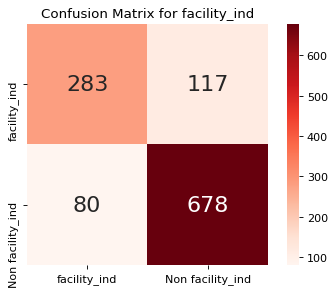

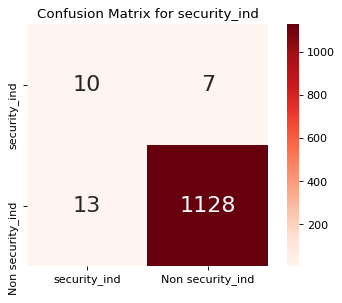

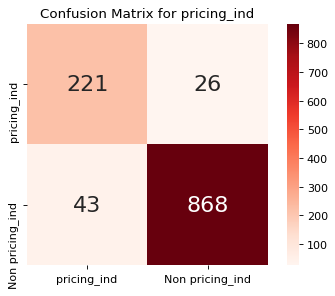

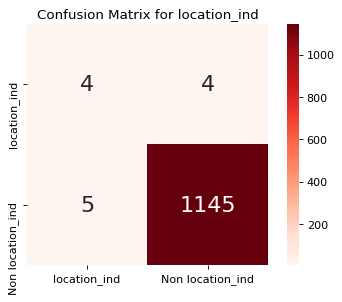

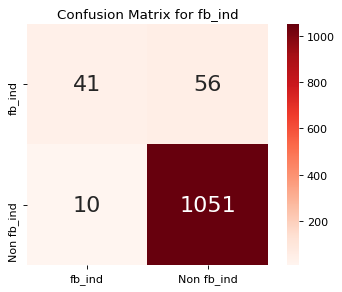

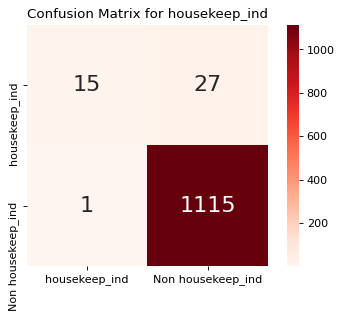

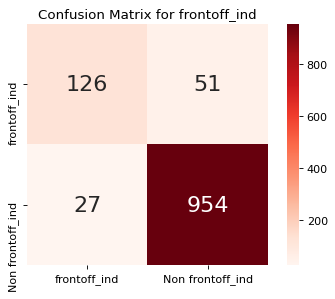

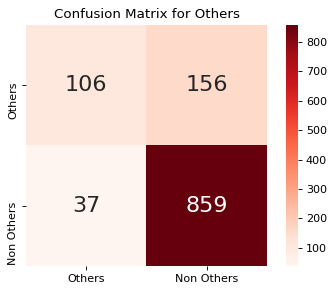

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
#predict_test_LGBM_offline0 =gbm.predict(X_test_tfidf, num_iteration=gbm.best_iteration)  # 输出概率
test_x=[X_test_tfidf0,X_test_tfidf1,X_test_tfidf2,X_test_tfidf3,X_test_tfidf4,
      X_test_tfidf5,X_test_tfidf6,X_test_tfidf7]
test_y=[y_test0,y_test1,y_test2,y_test3,y_test4,y_test5,y_test6,y_test7]
class_columns=['facility_ind', 'security_ind', 'pricing_ind',
       'location_ind', 'fb_ind', 'housekeep_ind', 'frontoff_ind', 'Others',]

models=[gbm_facility,gbm_security,gbm_pricing,gbm_location,gbm_fb,gbm_housekeeping,gbm_frontoffice,gbm_others]
def lgb_pre1(X_test_tfidf0,i):
    gbm=models[i]
    predict_test_LGBM_offline0=gbm.predict(X_test_tfidf, num_iteration=gbm.best_iteration)  # 输出概率
    for i in range(0,len(predict_test_LGBM_offline0)):
        if (predict_test_LGBM_offline0[i]>=0.5 ):
             predict_test_LGBM_offline0[i]=1
        else:
            predict_test_LGBM_offline0[i]=0
    return predict_test_LGBM_offline0

# Accuracy Score on test dataset
for i in range (0,8) :
  text_x_0=test_x[i]
  text_y_0=test_y[i]
  print("-----------******  "+class_columns[i]+"  ******-----------")
  predict_test_LGBM_offline= lgb_pre1(text_x_0,i)
  accuracy_test_LGBM_score0=accuracy_score(text_y_0,predict_test_LGBM_offline)
  print('\nAccuracy_score on test dataset : ', accuracy_test_LGBM_score0)
  print('Recall :',recall_score(text_y_0,predict_test_LGBM_offline))
  print('Precision :',precision_score(text_y_0,predict_test_LGBM_offline))
  print('F1 score:',f1_score(text_y_0, predict_test_LGBM_offline))
  labels = [1,0]
  cm = confusion_matrix(text_y_0, predict_test_LGBM_offline, labels)
  fig, ax = plt.subplots(dpi=80)
  plt.title ('Confusion Matrix for '+class_columns[i])   
  g = sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, annot_kws={"size":20}, square=True, fmt='d',
                  xticklabels=[class_columns[i],'Non '+ class_columns[i]],
                  yticklabels=[class_columns[i], 'Non '+class_columns[i]]);
  plt.savefig('cm_lr'+class_columns[i]+'.jpg')
  #plt.show()

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree


lr = LogisticRegression()
#C=1,verbose=2,random_state=42,max_iter=150)#class_weight={1: 0.66,0:0.34}
lr_facility=LogisticRegression().fit(X_train_tfidf0,y_train0)
lr_security=LogisticRegression().fit(X_train_tfidf1,y_train1)
lr_pricing=LogisticRegression().fit(X_train_tfidf2,y_train2)
lr_location=LogisticRegression().fit(X_over, y_over)
lr_fb=LogisticRegression().fit(X_train_tfidf4,y_train4)
lr_housekeeping=LogisticRegression().fit(X_train_tfidf5,y_train5)
lr_frontoffice=LogisticRegression().fit(X_train_tfidf6,y_train6)
lr_others=LogisticRegression().fit(X_train_tfidf7,y_train7)
models_lr=[lr_facility,lr_security,lr_pricing,lr_location,lr_fb,lr_housekeeping,lr_frontoffice,lr_others]

-----------******  facility_ind  ******-----------

Accuracy_score on test dataset :  0.8324697754749568
Recall : 0.69
Precision : 0.7976878612716763
F1 score: 0.7399463806970509
-----------******  security_ind  ******-----------

Accuracy_score on test dataset :  0.9853195164075993
Recall : 0.0
Precision : 0.0
F1 score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------******  pricing_ind  ******-----------

Accuracy_score on test dataset :  0.9317789291882557
Recall : 0.7651821862348178
Precision : 0.9
F1 score: 0.8271334792122538
-----------******  location_ind  ******-----------

Accuracy_score on test dataset :  0.9844559585492227
Recall : 0.75
Precision : 0.2727272727272727
F1 score: 0.39999999999999997
-----------******  fb_ind  ******-----------

Accuracy_score on test dataset :  0.9291882556131261
Recall : 0.15463917525773196
Precision : 1.0
F1 score: 0.2678571428571429
-----------******  housekeep_ind  ******-----------

Accuracy_score on test dataset :  0.966321243523316
Recall : 0.07142857142857142
Precision : 1.0
F1 score: 0.13333333333333333
-----------******  frontoff_ind  ******-----------

Accuracy_score on test dataset :  0.9222797927461139
Recall : 0.5932203389830508
Precision : 0.8536585365853658
F1 score: 0.6999999999999998
-----------******  Others  ******-----------

Accuracy_score on test dataset :  0.833333333333333

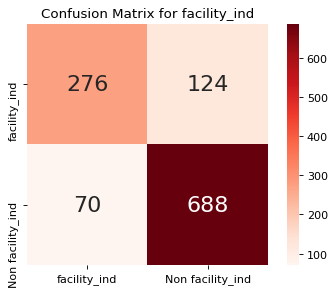

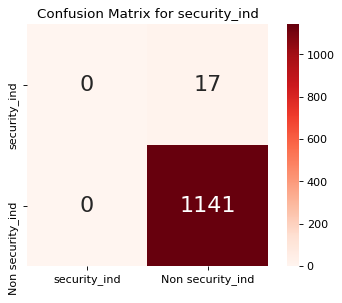

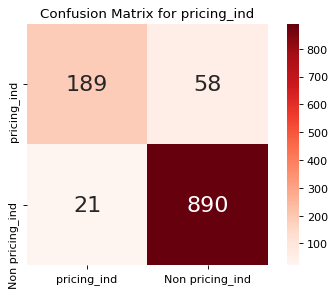

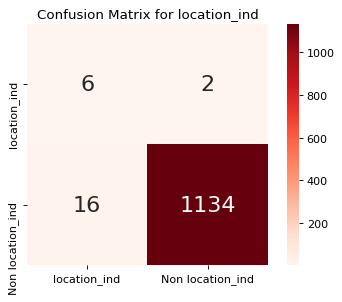

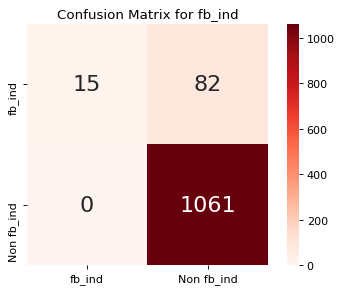

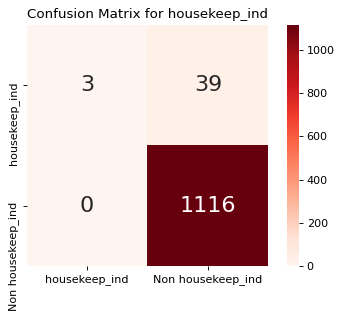

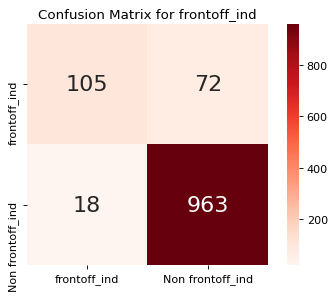

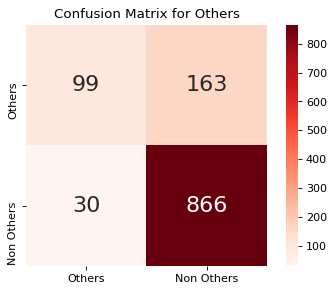

In [0]:


test_x=[X_test_tfidf0,X_test_tfidf1,X_test_tfidf2,X_test_tfidf3,X_test_tfidf4,
      X_test_tfidf5,X_test_tfidf6,X_test_tfidf7]
test_y=[y_test0,y_test1,y_test2,y_test3,y_test4,y_test5,y_test6,y_test7]
class_columns=['facility_ind', 'security_ind', 'pricing_ind',
       'location_ind', 'fb_ind', 'housekeep_ind', 'frontoff_ind', 'Others',]


# Accuracy Score on test dataset
for i in range (0,8) :
  text_x_0=test_x[i]
  text_y_0=test_y[i]
  print("-----------******  "+class_columns[i]+"  ******-----------")
  lr=models_lr[i]
  predict_test_LR_offline0 = lr.predict(X_test_tfidf)
  accuracy_test_LR_score0=accuracy_score(text_y_0,predict_test_LR_offline0)
  print('\nAccuracy_score on test dataset : ', accuracy_test_LR_score0)
  print('Recall :',recall_score(text_y_0,predict_test_LR_offline0))
  print('Precision :',precision_score(text_y_0,predict_test_LR_offline0))
  print('F1 score:',f1_score(text_y_0, predict_test_LR_offline0))
  labels = [1,0]
  cm = confusion_matrix(text_y_0, predict_test_LR_offline0, labels)
  fig, ax = plt.subplots(dpi=80)
  plt.title ('Confusion Matrix for '+class_columns[i])   
  g = sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, annot_kws={"size":20}, square=True, fmt='d',
                  xticklabels=[class_columns[i], 'Non '+class_columns[i]],
                  yticklabels=[class_columns[i],'Non '+ class_columns[i]]);
  plt.savefig('cm_lr'+class_columns[i]+'.jpg')
  #plt.show()
  